In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
path="../RealtimeDataset"
X=[]
y=[]
person_names=[]

In [17]:
height=200
width=200

In [18]:
for person in os.listdir(path):
    person_path=os.path.join(path,person)

    if os.path.isdir(person_path):
        person_names.append(person)

        for img_name in os.listdir(person_path):
            img_path=os.path.join(person_path,img_name)
            img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
            
            if(img is not None):
                img=cv2.resize(img,(200,200))
                img_flatten = img.flatten()
                X.append(img_flatten)
                y.append(person)
                
X=np.array(X)
y=np.array(y)

In [19]:
print(X.shape)
print(y.shape)

(410, 40000)
(410,)


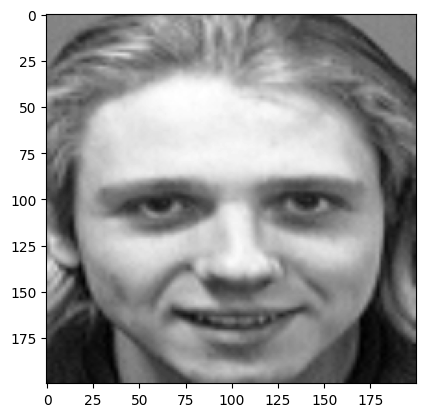

In [20]:
plt.imshow(X[45].reshape(height,width), cmap="gray")
plt.show()

In [21]:
mean_face=np.mean(X,axis=0)
X_centered = X - mean_face

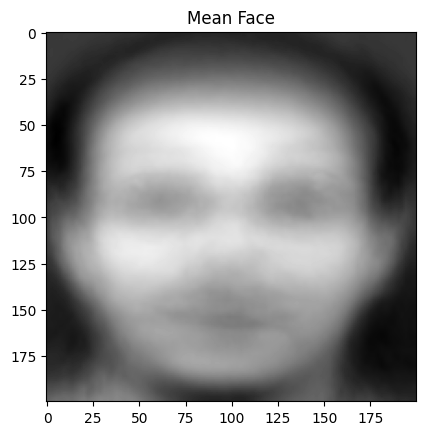

In [22]:
plt.imshow(mean_face.reshape(height,width), cmap="gray")
plt.title("Mean Face")
plt.show()

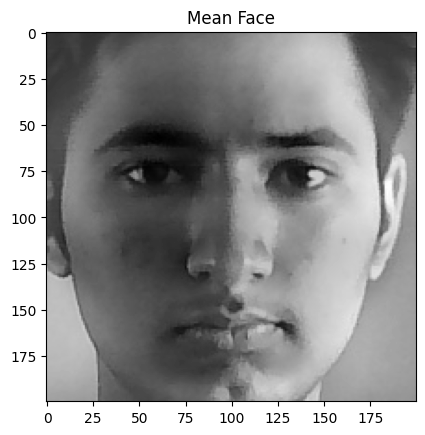

In [23]:
plt.imshow(X_centered[0].reshape(height,width), cmap="gray")
plt.title("Mean Face")
plt.show()

In [24]:
n_component=50
pca=PCA(n_component)
X_pca=pca.fit_transform(X_centered)

eigenfaces = pca.components_

print(f"Eigenfaces shape: {eigenfaces.shape}")

Eigenfaces shape: (50, 40000)


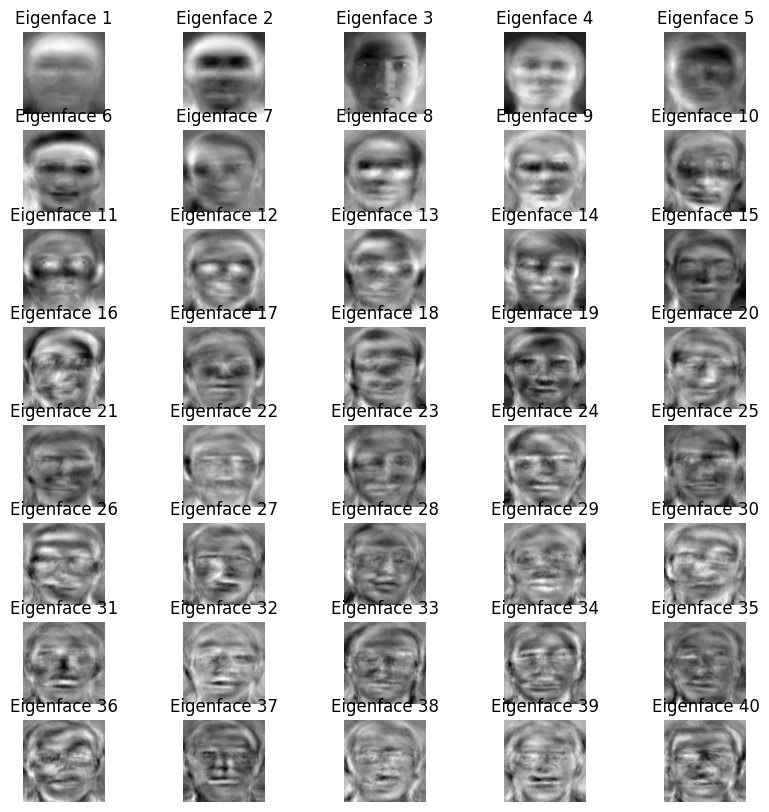

In [25]:
fig, axes = plt.subplots(8, 5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i].reshape(height,width), cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')

plt.show()


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)

In [27]:
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [28]:
y_pred=knn.predict(X_test)

In [29]:
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report: \n{report}")

Accuracy: 0.9512195121951219
Confusion Matrix: 
[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
Classification Report: 
              precision    recall  f1-score   support

      Pranav       1.00      1.00      1.00         2
          s1       0.50      0.50      0.50         2
         s10       1.00      0.50      0.67         2
         s11       1.00      1.00      1.00         2
         s12       1.00      1.00      1.00         2
         s13       1.00      1.00      1.00         2
         s14       1.00      1.00      1.00         2
         s15       1.00      1.00      1.00         2
         s16       1.00      0.50      0.67         2
         s17       1.00      1.00      1.00         2
         s18       0.67      1.00      0.80         2
         s19       1.00      1.00      1.00         2
          s2       1.00      1.00      1.00         2
         s20       1.00      1.00      1.00        

In [30]:
import pickle

In [31]:
# with open("face_recognition_model.pkl","wb") as f:
#     pickle.dump(knn,f)